# Whelks and lobsters -- split context

## The system

In [3]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [59]:
%matplotlib inline
%display plain

In [5]:
from lbuc.symbolic import var

In [6]:
from lbuc.interval_utils import fintervals

In [7]:
R.<x,y> = RIF[]

In [8]:
from lbuc import *

In [9]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = vector([RIF(1,1.1), RIF(4,5)])

In [10]:
v3 = vector([RIF(1,1.05), RIF(4,4.5)])

In [11]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

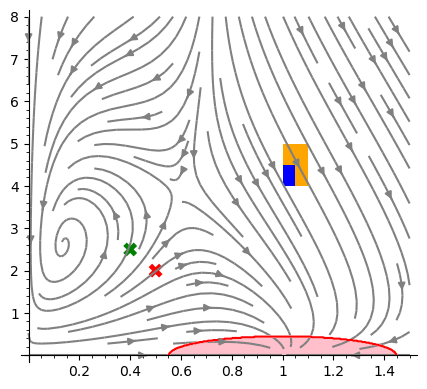

In [12]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='blue')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [ ]:
v3s = vector([RIF(0, 0.05), RIF(0, 0.5)]); fintervals(v3s)

In [40]:
v2b = v3 + v3s; fintervals(v2b)

[[1.0000000000000000 .. 1.1000000000000001], [4 .. 5]]

In [41]:
[(a.str(style='brackets'), b.str(style='brackets'))
 for (a, b) in list(zip(v3, v3s))]

[ ( [1.0000000000000000 .. 1.0500000000000001],

 [0.0000000000000000 .. 0.050000000000000003] ),

 ( [4.0000000000000000 .. 4.5000000000000000],

 [0.0000000000000000 .. 0.50000000000000000] ) ]

In [18]:
from lbuc.bondcalculus import System

In [19]:
sys = System(SR, us, v2, vf)

## Reach initials tests

In [20]:
from flowstar.reachability import Reach

def compute_reach(y0, y0_ctx=None):
    return sys.with_y0(y0, y0_ctx).reach(20,
                 order=5, step=(0.01, 0.5),
                 precondition=1,
                 estimation=1e-3,
                 integrationScheme=2,
                 cutoff_threshold=1e-7)

In [21]:
reach = compute_reach(v2)

calling reach with y0 = ['[1.0000000000000000 .. 1.1000000000000001]', '[4.0000000000000000 .. 5.0000000000000000]']
ode in symbolic ring
str_odes = ['(x)^2*y*[0.300000000000000, 0.300000000000000] + (x)^2*[-0.600000000000000, -0.600000000000000] + x*y*[-0.240000000000001, -0.239999999999999] + x*[0.600000000000000, 0.600000000000000]', '(x)^2*y*[-2.00000000000000, -2.00000000000000] + x*y*[1.60000000000000, 1.60000000000000] + (y)^2*[-0.0500000000000000, -0.0500000000000000] + y*[-0.0500000000000000, -0.0500000000000000]']
crude_roots = False
run = True
_handle_initials called!
vars = ['x', 'y']
C = [1.0..1.1]
C = [4.0..5.0]
run within string args
integrationScheme = 4


var_id_x = 0
var_id_y = 1


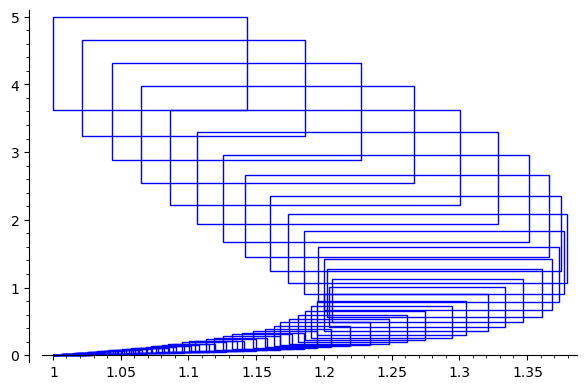

In [25]:
p = reach.sage_interval_plot('x', 'y')
p.set_aspect_ratio(1/20)
p

calling reach with y0 = ['[1.0000000000000000 .. 1.0500000000000001]', '[4.0000000000000000 .. 4.5000000000000000]']
ode in symbolic ring
str_odes = ['(x)^2*y*[0.300000000000000, 0.300000000000000] + (x)^2*[-0.600000000000000, -0.600000000000000] + x*y*[-0.240000000000001, -0.239999999999999] + x*[0.600000000000000, 0.600000000000000]', '(x)^2*y*[-2.00000000000000, -2.00000000000000] + x*y*[1.60000000000000, 1.60000000000000] + (y)^2*[-0.0500000000000000, -0.0500000000000000] + y*[-0.0500000000000000, -0.0500000000000000]']
crude_roots = False
run = True
_handle_initials called!
vars = ['x', 'y']
C = [1.0..1.05]
C = [4.0..4.5]
run within string args
integrationScheme = 4
var_id_x = 0
var_id_y = 1


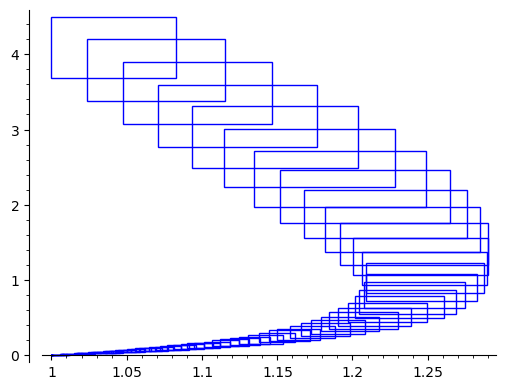

In [27]:
reach = compute_reach(v3)
p = reach.sage_interval_plot('x', 'y')
p.set_aspect_ratio(1/20)
p

In [60]:
[(a.str(style='brackets'), b.str(style='brackets')) for a,b in list(zip(v3, v3s))]

[('[1.0000000000000000 .. 1.0500000000000001]',
  '[0.0000000000000000 .. 0.050000000000000003]'),
 ('[4.0000000000000000 .. 4.5000000000000000]',
  '[0.0000000000000000 .. 0.50000000000000000]')]

In [61]:
[a.str(style='brackets') for a in v2]

['[1.0000000000000000 .. 1.1000000000000001]',
 '[4.0000000000000000 .. 5.0000000000000000]']

In [62]:
[a.str(style='brackets') for a,b in list(zip(v3, v3s))]

['[1.0000000000000000 .. 1.0500000000000001]',
 '[4.0000000000000000 .. 4.5000000000000000]']

In [63]:
sys.with_y0(v3, v3s)

System(R, (x, y), [[1.0000000000000000 .. 1.0500000000000001], [4.0000000000000000 .. 4.5000000000000000]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))

In [64]:
System?

Init signature: System(R, x: tuple, y0: tuple, y: tuple, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
File:           ~/Documents/PhD/Notebooks/lbuc/bondcalculus.py
Type:           type


calling reach with y0 = [('[0.0000000000000000 .. 0.050000000000000003]', '[1.0000000000000000 .. 1.0500000000000001]'), ('[0.0000000000000000 .. 0.50000000000000000]', '[4.0000000000000000 .. 4.5000000000000000]')]
ode in symbolic ring
str_odes = ['(x)^2*y*[0.300000000000000, 0.300000000000000] + (x)^2*[-0.600000000000000, -0.600000000000000] + x*y*[-0.240000000000001, -0.239999999999999] + x*[0.600000000000000, 0.600000000000000]', '(x)^2*y*[-2.00000000000000, -2.00000000000000] + x*y*[1.60000000000000, 1.60000000000000] + (y)^2*[-0.0500000000000000, -0.0500000000000000] + y*[-0.0500000000000000, -0.0500000000000000]']
crude_roots = False
run = True
_handle_initials called!
vars = ['x', 'y']
C = [0.0..0.05]
S = [1.0..1.05]
C = [0.0..0.5]
S = [4.0..4.5]
run within string args
integrationScheme = 4
var_id_x = 0
var_id_y = 1


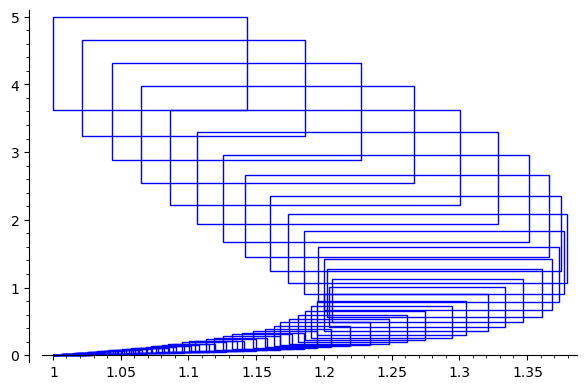

In [65]:
reach = compute_reach(v3, v3s)
p = reach.sage_interval_plot('x', 'y')
p.set_aspect_ratio(1/20)
p

## Simple signal

In [49]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 1.0500000000000001]', '[4.0000000000000000 .. 4.5000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.05]
C = [4.0..4.5]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 1.77 seconds
Computed 501 flowpipes in 1.7706871569998839 sec
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7ff4824bd660>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?

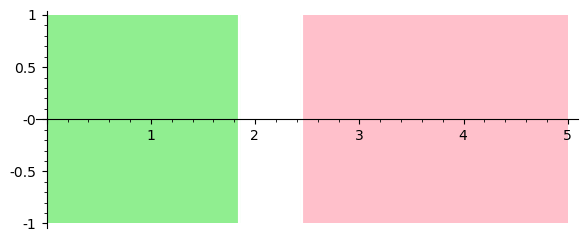

In [50]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5)
sig.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 1.0500000000000001]', '[4.0000000000000000 .. 4.5000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.05]
C = [4.0..4.5]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 1.70 seconds
Computed 501 flowpipes in 1.6964198610012318 sec
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7ff4824bd9e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*

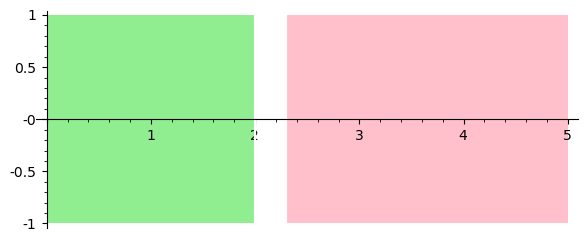

In [51]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
sig.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 1.0500000000000001]', '[4.0000000000000000 .. 4.5000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.05]
C = [4.0..4.5]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.24 seconds
Computed 57 flowpipes in 0.24242246100038756 sec
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7ff4824bde40>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*

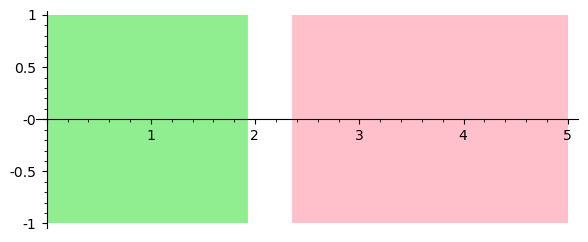

In [52]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True,
                    verbosity=3)
sig.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 1.0500000000000001]', '[4.0000000000000000 .. 4.5000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.05]
C = [4.0..4.5]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.27 seconds
Computed 57 flowpipes in 0.27238000300076237 sec
PolyObserver(x - 1.1500000000000000?, <flowstar.reachability.Reach object at 0x7ff4ad22c9e0>, 0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-

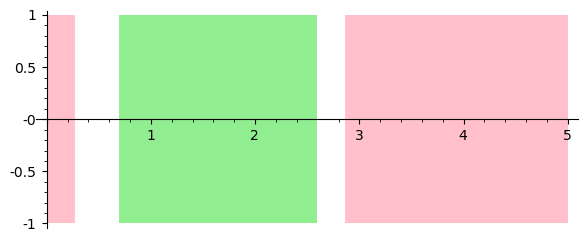

In [53]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5)
sig2.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 1.0500000000000001]', '[4.0000000000000000 .. 4.5000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.05]
C = [4.0..4.5]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.28 seconds
Computed 57 flowpipes in 0.2783829150012025 sec
PolyObserver(x - 1.1500000000000000?, <flowstar.reachability.Reach object at 0x7ff482538200>, 0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-lev

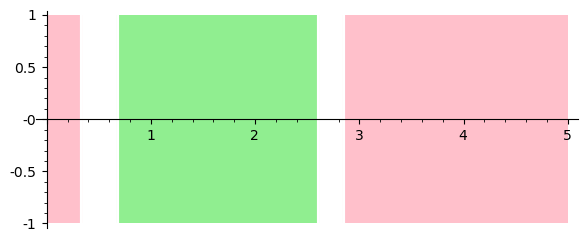

In [54]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

In [55]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7)

ode in polynomial ring
crude_roots = False
vars = None
_handle_initials called!
vars = [x, y]
C = [1.0..1.05]
C = [4.0..4.5]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


var_id_x = 0
var_id_y = 1


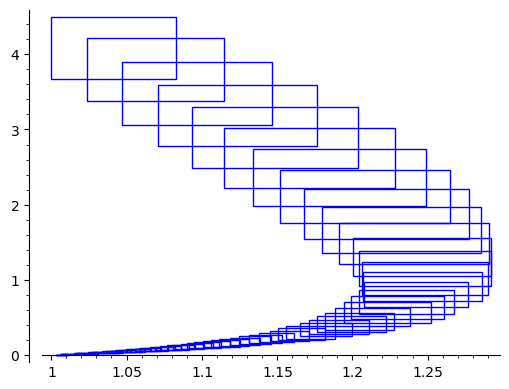

In [58]:
p = reach.sage_interval_plot('x', 'y')
p.set_aspect_ratio(1/20)
p

### Polynomial plot

In [ ]:
reach.symbolic_composition = True

In [ ]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [ ]:
p1 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3))
p1

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf), verbosity=10)

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
J = RIF(1.5184870921717871, 1.5184870921717871)

In [ ]:
J.center()

In [ ]:
reach.eval_poly(Poly(P.p), J.center())

In [ ]:
reach.symbolic_composition = False

In [ ]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [ ]:
p2 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3),
                     color=['orange', 'magenta'])
p2

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf))

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
p1 + p2 + sig.to_domain(RIF(1, 3)).plot(aspect_ratio='automatic')

### $x \ge 1.15$

In [ ]:
q = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: x - 1.15 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
q.set_aspect_ratio(1/6)

In [ ]:
q + reach.sage_interval_plot('x', 'y',
                             poly=x - 1.15,
                             aspect_ratio='automatic')

In [ ]:
reach.symbolic_composition = True

In [ ]:
q1 = reach.sage_plot(x - 1.15, (0, 3.5))
q1

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf))

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
reach.symbolic_composition = False

In [ ]:
q2 = reach.sage_plot(x - 1.15, (0, 3.5),
                     color=['orange', 'magenta'])
q2

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf))

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
q1 + q2 + sig2.to_domain(RIF(0, 3.5)).plot(aspect_ratio='automatic')

## Context

In [ ]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
#    symbolic_composition=True,
)
args = (vf, v3, 7)

In [ ]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [ ]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
{x: 1, y: 2}

In [ ]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [ ]:
sorted(kxs)

In [ ]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])